## Using Linear Regression and ARIMA Model

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns


## Reading the data

In [2]:
df=pd.read_csv('data/allCombined_data.csv')
df

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total EU27_x,Total Non EU_x,Total Export,Total EU27_y,Total Non EU_y,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,110685,76139,186824,118975,107664,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,114783,75899,190682,131885,107429,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,115045,72414,187459,141776,100230,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,111256,76627,187883,143112,102066,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,111972,79090,191062,147523,110890,258413,74.00,69.00,4.8,1982500
5,2005,79.404250,60413300,39.9,1123830,4.50,9.8,14.8,121761,90733,212494,162031,124508,286539,77.00,74.50,4.8,2036675
6,2006,81.356333,60827100,39.9,1133245,5.00,6.0,31.9,154209,92209,246418,188480,140199,328679,79.25,78.25,5.4,2085162
7,2007,83.305000,61319100,40.2,1171806,5.50,2.5,7.7,128765,94060,222825,173818,142573,316391,82.50,85.00,5.3,2139895
8,2008,86.222583,61823800,43.5,1162090,2.00,16.7,19.8,142261,110332,252593,185623,163008,348631,80.00,82.00,5.7,2134571
9,2009,87.933417,62260500,46.3,1124339,0.50,-8.8,13.7,125893,102058,227951,167776,149431,317207,70.25,68.25,7.6,2035942


## Visualising the change in GDP throughtout year

<Axes: xlabel='Year'>

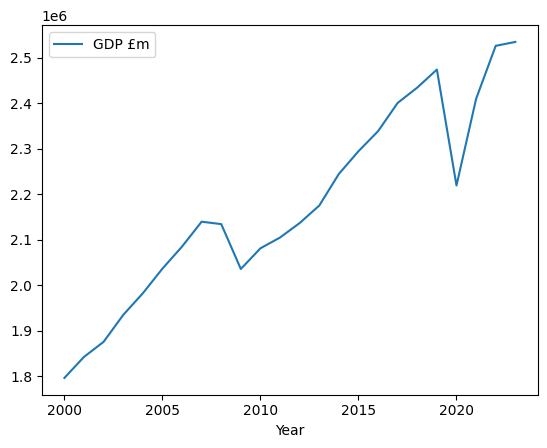

In [3]:
columns=['Year','GDP £m']
df1=pd.DataFrame(df[columns])
df1.plot(x='Year',y='GDP £m')

## Plotting ACF Chart and PACF Chart

_You’re likely to see high correlation at the first lag because each year’s GDP is quite similar to the previous year due to a growth trend. This tells you that last year’s GDP can give you a good idea about this year’s GDP, but as you go further back (say 4-5 years), the correlation will likely drop off, meaning those earlier years are less directly connected to the current year’s GDP._

In simple terms, the ACF chart helps you see how much your data depends on its past values, and whether there’s a pattern to that dependency over time.

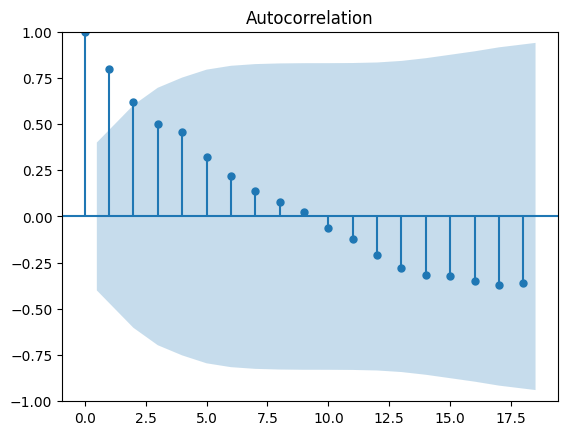

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


plot_acf(df['GDP £m'], lags=18)
plt.show()


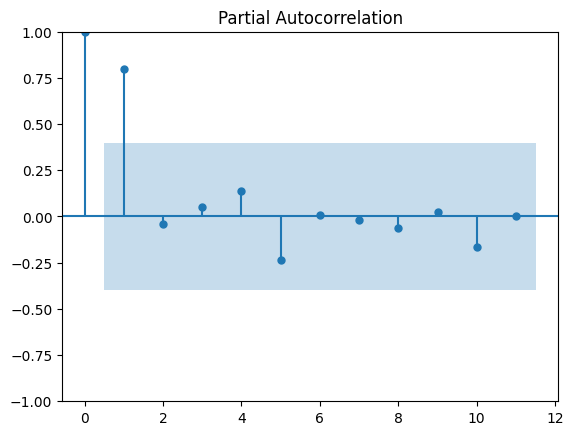

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df1['GDP £m'],lags=11)
plt.show()

__Test for stationarity__


__What is Stationarity?__
Consider an example for checking the temperature of each year for that specific month. Now we will take the case of month January where we observer its temperature to be 5 °C in year 2019. Similarly for the year 2020,2021,2022,2023, the value fluctuates between 5.1,5.3,5.0,5.2 °C. Meaning that the data is staionary for the same month for each year. This suggest that the mean and variance are relatively constant.

Coming back to our dataset, the GDP is observed to be increasing which means that there is no stationarity.

This can be useful in setting the correct value for the 'd' parameter.

__ADF (Augmented Dickey-Fuller)__ is a statitstical test that is used to determine whether the data is stationary or not.

This is useful for forecasting the future sales, as in the given dataset its statistical properties does not change over time.

Once the data is stationary, then we can use the ARIMA model to predict the future GDP.

In [6]:
from statsmodels.tsa.stattools import adfuller
adful=adfuller(df['GDP £m'])
adful

#  ADF statistics value is -1.0168 which suggests that value is quite high (less negative), which suggests weaker evidence against null hypothesis of non-stationarity
# p value that is 0.747 is quite high compared to 0.05 (significan level), which suggests that there is failure of rejecting null hypothesis, leading to non-stationary of the data
# Lags used is 0, meaning no lagged terms were used in the test. This could happen if the series does not show significant autocorrelation.
# number of obs. 23 states that data points used in the test.
# -----------------------------------------------------------
#  These are the critical values for the ADF statistic at different significance levels. For your statistic of -1.017:
# It is greater than all three critical values (-3.753, -2.998, -2.639).

(-1.01685528234652,
 0.747067190798842,
 0,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 362.12146545518124)

In [7]:
from statsmodels.tsa.stattools import adfuller

# Define the function to perform the ADF test
def adfuller_check(GDP):
    results = adfuller(GDP)  # Perform the ADF test
    labels = ['ADF Test Statistic', 'p-value', 'No. of Lags Used', 'No. of Observations']
    
    # we are combining both the results and lables
    for result, label in zip(results, labels):
        print(label + " : " + str(result))
    
    # checking if the p value is less than 0.05 or more than 0.05
    if results[1] <= 0.05:  # p-value obtained directly from results
        print("Reject Null Hypothesis: Data is stationary")
    else:
        print("Fail to Reject Null Hypothesis: Data is non-stationary")


adfuller_check(df['GDP £m'])


ADF Test Statistic : -1.01685528234652
p-value : 0.747067190798842
No. of Lags Used : 0
No. of Observations : 23
Fail to Reject Null Hypothesis: Data is non-stationary


## Since the data is not Stationary, what do we do?

__Differencing__
This involves subtracting the previous observation from the current observation. Until the df becomes stationary. 

In [8]:
# df['Differenced GDP']=df['Blue Book 2017 nominal GDP']-df['Blue Book 2017 nominal GDP'].shift(1)
df1['Differencing GDP']=df['GDP £m'].diff()      # shifted by 1
df1

,Year,GDP £m,Differencing GDP
0,2000,1796500,NaN
1,2001,1842720,46220.0
2,2002,1875809,33089.0
3,2003,1934941,59132.0
4,2004,1982500,47559.0
5,2005,2036675,54175.0
6,2006,2085162,48487.0
7,2007,2139895,54733.0
8,2008,2134571,-5324.0
9,2009,2035942,-98629.0


ADF Test Statistic : -4.403431881290172
p-value : 0.00029270885679813003
No. of Lags Used : 9
No. of Observations : 13
Reject Null Hypothesis: Data is stationary


<Axes: >

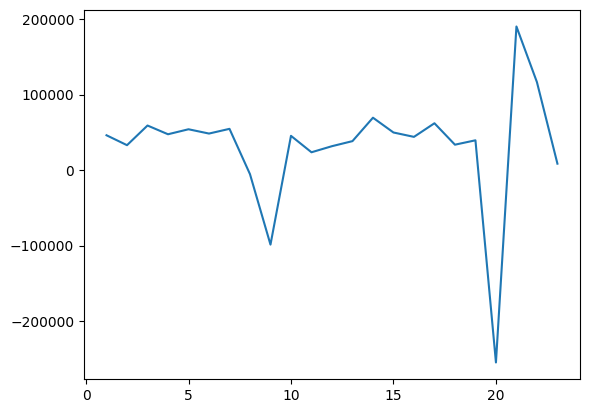

In [9]:
adfuller_check(df1['Differencing GDP'].dropna())
# removing the null values for prevention of the error

# now the df is stationary
df1['Differencing GDP'].plot()

## AutoRegressive Model

used for analyzing and forecasting the time series

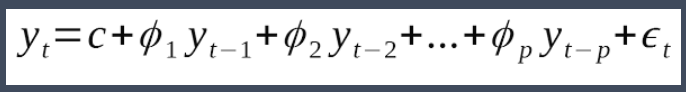

t-1, t-2 are the lag in the above formula


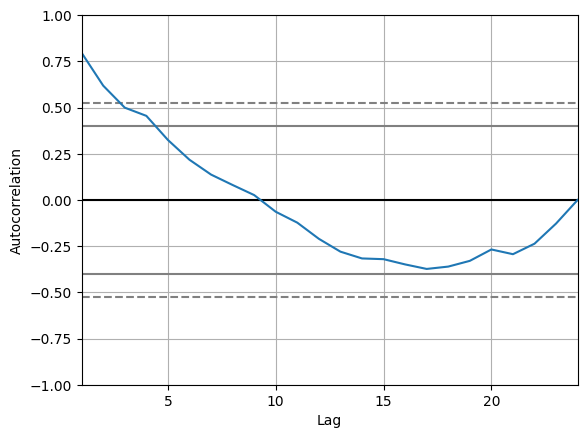

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['GDP £m'])
plt.show()

# how many previous data to be considered for finding the lag

# Lag 0:

# The first bar usually represents lag 0, which always equals 1. This just shows that the data is perfectly correlated with itself at the same time point.
# Lag 1:

# If this bar is high, it means that the GDP value this year is similar to last year's value. A strong positive value here means that if last year's GDP was high, this year's GDP is likely to be high as well.
# Lag 2:

# If the value is still high (but less than lag 1), it suggests that GDP two years ago also influences the current year's GDP. However, the influence starts to weaken as we move further back in time.
# Lags 3, 4, 5, 6, 7:

# As you mentioned, if the values keep decreasing, it indicates that the connection between the current GDP and GDP from three, four, or five years ago is getting weaker. This means older GDP values have less effect on this year's GDP.
# Negative Values (Lags 8 to 17):

# When the plot shows negative values for lags 8 to 17, it suggests an alternating pattern. This means if the GDP was high one year, it might be lower the next year. In simple words, high GDP and low GDP might be alternating over these years. This oscillation might indicate a cycle, where good and bad years for GDP follow each other.
# Return to Zero (Lags 18 onward):

# After lag 17, if the values start to rise back toward zero, it means that past GDP values from 17 years ago don’t affect this year's GDP much anymore. Essentially, the influence of older data fades away.

__AutoCorrelation and Partial AutoCorrelation__
__Autocorrelation__ measures how a time series is correlated with itself at different time lags
Identification of MA model is often done best with PACF (finding the q value).

__Partial AutoCorrelation__: it tells you how much a specific lag contributes to the correlation after removing the effects of other lags.
Identification of AR model is often done best with PACF (finding the p value).


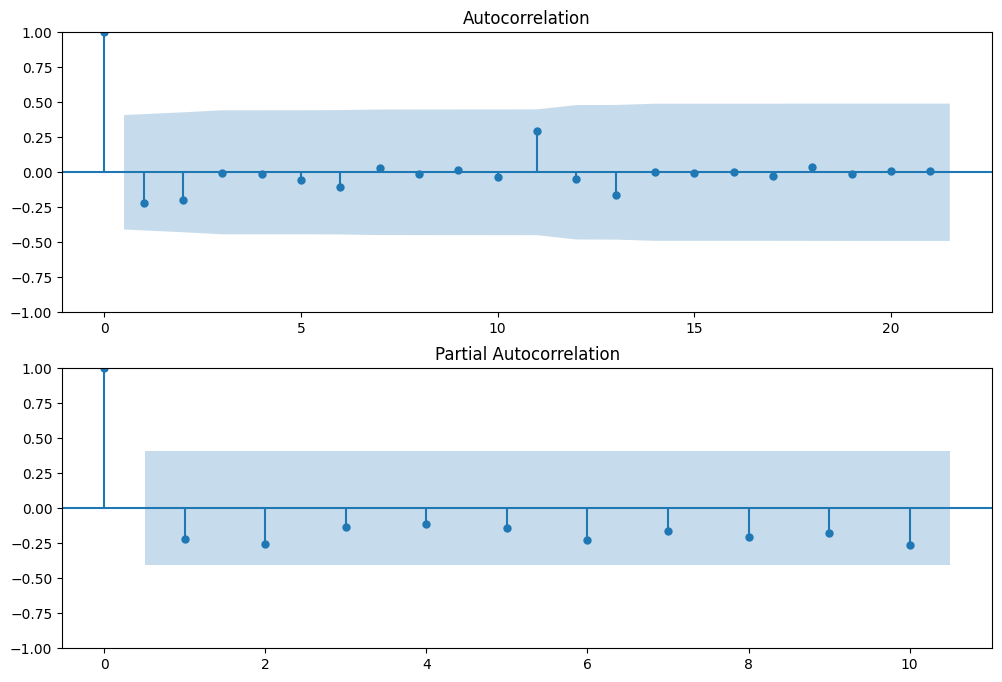

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df1['Differencing GDP'].iloc[1:],lags=21,ax=ax1)
ax1=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df1['Differencing GDP'].iloc[1:],lags=10,ax=ax1)

# based on ACF

# -----------
# ACF Plot: Look for the lag where the ACF values drop to near zero. This indicates the order 𝑞 for the MA part.
# Based on the ACF plot, the order q for the Moving Average (MA) part of the ARIMA model is likely 2, as the first two lags are outside the confidence interval and significant.
# q=2

# PACF Plot: Look for the lag where the PACF values drop to near zero. This indicates the order p for the AR part.
# Since the first lag is significant and subsequent lags are insignificant, the order p for the AR component is likely 1.
# p=1

In [12]:
model=ARIMA(df1['Differencing GDP'],order=(6,1,0))
model_fit=model.fit()
model_fit.summary()

f:\viraj\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Differencing GDP   No. Observations:                   24
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -294.095
Date:                Wed, 06 Nov 2024   AIC                            602.190
Time:                        20:54:23   BIC                            610.138
Sample:                             0   HQIC                           604.189
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9883      0.224     -4.405      0.000      -1.428      -0.549
ar.L2         -0.9551      0.438     -2.179      0.029      -1.814      -0.096
ar.L3         -0.7918      1.325     -0.598      0.550      -3.388       1.805
ar.L4         -0.5095      1.438     -0.354      0.723      -3.328       2.309
ar.L5         -0.3284      1.522     -0.216      0.829      -3.312       2.655
ar.L6         -0.2634      0.874     -0.301      0.763      -1.976       1.449
sigma2      8.843e+09   1.35e-10   6.54e+19      0.000    8.84e+09    8.84e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                55.64
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              20.47   Skew:                            -2.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.38e+36. Standard errors may be unstable.
"""

## Using Arima Model

If you choose p=2, the model would use GDP values from the last two periods (e.g., last two years) to help predict the next GDP value. So, for forecasting GDP in 2002, it would look at GDP values from 2000 and 2001.

If 𝑑=1, the model will use the difference between GDP values from consecutive years. So, it will calculate the difference between GDP in 2001 and 2000, 2000 and 1999, and so on. If 𝑑=2, it will apply differencing twice, making it sensitive to changes over two periods, like (GDP in 2002 - GDP in 2001) − (GDP in 2001 - GDP in 2000)(GDP in 2002 - GDP in 2001)−(GDP in 2001 - GDP in 2000).

If 𝑞=1, the model uses the error from the previous year’s forecast when calculating the current year’s GDP prediction. For 𝑞=2, it considers errors from the past two years.

In [13]:
df1['GDP £m'] = df1['GDP £m'].astype(float)
df1['Year']=df1['Year'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              24 non-null     float64
 1   GDP £m            24 non-null     float64
 2   Differencing GDP  23 non-null     float64
dtypes: float64(3)
memory usage: 708.0 bytes


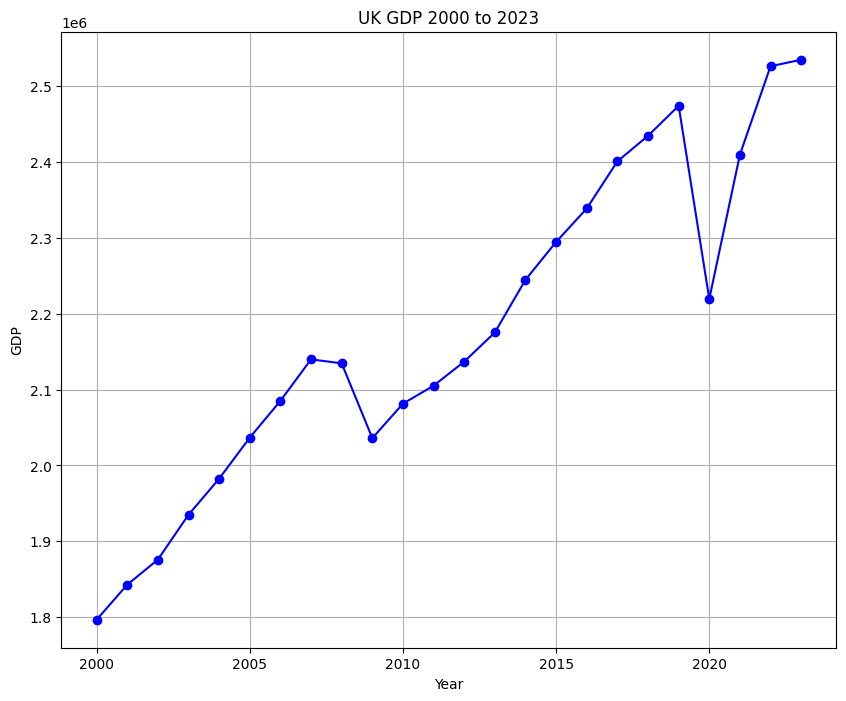

In [14]:
# visualising the original GDP data values
plt.figure(figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('GDP')
plt.plot(df1['Year'],df1['GDP £m'],marker='o',color='blue')
plt.title('UK GDP 2000 to 2023')
plt.grid()
plt.show()

__Splitting train test data from 2000 to 2018 & 2019 to 2023__

Value of d:

The value of d typically ranges from 0 to 2. In most practical applications, d = 1 is sufficient for achieving stationarity. Since your dataset is relatively small (23 observations), it's advisable to keep d at 1 or potentially 0 if the series is already stationary.
Value of p (Autoregressive part):

The value of p can be set to a maximum of 2 or 3 in small datasets. A higher value of p increases the model's complexity, which may not be justified with limited data.
A good rule of thumb is to keep p at a maximum of 5% of the number of observations. For 23 observations, this suggests a maximum p of about 1 or 2.

Value of q (Moving Average part):
Similarly, the value of q can also be kept to a maximum of 2 or 3 for a small dataset.
Following the same rule of thumb, a maximum q of about 1 or 2 is reasonable for your dataset.

f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Forecasted GDP values:
2451666.54
2435566.31
2492465.15
2489247.67
2547318.37
2574620.83


f:\viraj\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


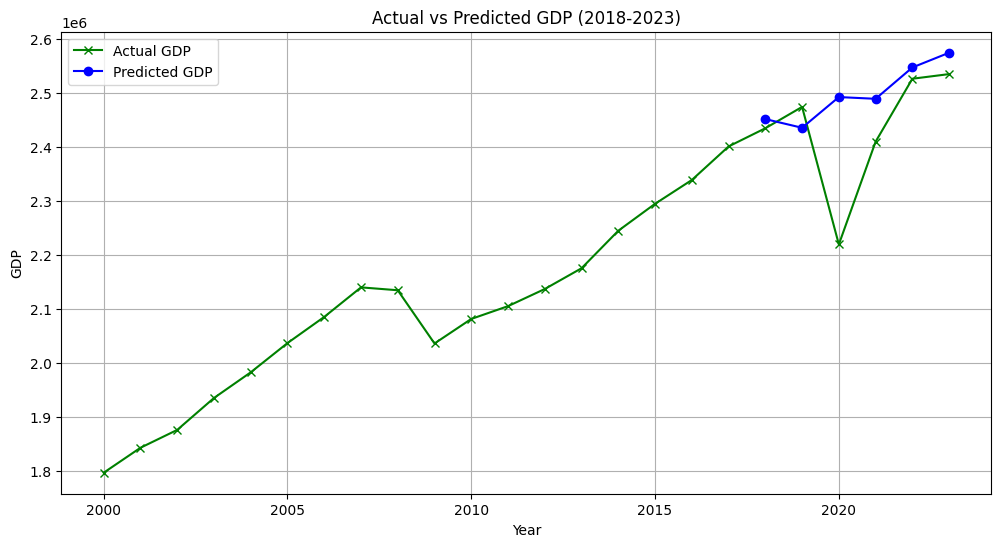

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

gdpdf=df1['GDP £m']

train = df1[df1['Year'] < 2019]['Differencing GDP'].dropna()  # gdp values from 2000 to 2018
test = df1[df1['Year'] > 2017]['Differencing GDP']  # v values from 2019 to 2023
years=df1['Year'].iloc[18:]

# ARIMA parameters
# p is the number of points that does not lies outside the bound
# d is the number of times the differencing occured
p, d, q =10, 1, 1

# Fit the ARIMA model
model = ARIMA(train, order=(p, d, q))
modelpred = model.fit()

# forecast the values for the test set
forecast = modelpred.forecast(steps=len(test))

# reverting back to the original data values after differncing the values
lastgdp = gdpdf.iloc[-1]        # last GDP value from the dataset

predicted = [lastgdp + sum(forecast[:i+1]) for i in range(len(forecast))]       # adding the values back like we subtracted in differencing to recover the values

print("Forecasted GDP values:")
for idx, value in enumerate(predicted):
    print(f"{value:.2f}")  # Formatting for better readability

# visualisation
plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['GDP £m'], label='Actual GDP', marker='x',color='green')
plt.plot(years, predicted, label='Predicted GDP', marker='o', color='blue')
plt.title('Actual vs Predicted GDP (2018-2023)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid()
plt.show()



In [16]:
df1

,Year,GDP £m,Differencing GDP
0,2000.0,1796500.0,NaN
1,2001.0,1842720.0,46220.0
2,2002.0,1875809.0,33089.0
3,2003.0,1934941.0,59132.0
4,2004.0,1982500.0,47559.0
5,2005.0,2036675.0,54175.0
6,2006.0,2085162.0,48487.0
7,2007.0,2139895.0,54733.0
8,2008.0,2134571.0,-5324.0
9,2009.0,2035942.0,-98629.0


In [17]:
df1

,Year,GDP £m,Differencing GDP
0,2000.0,1796500.0,NaN
1,2001.0,1842720.0,46220.0
2,2002.0,1875809.0,33089.0
3,2003.0,1934941.0,59132.0
4,2004.0,1982500.0,47559.0
5,2005.0,2036675.0,54175.0
6,2006.0,2085162.0,48487.0
7,2007.0,2139895.0,54733.0
8,2008.0,2134571.0,-5324.0
9,2009.0,2035942.0,-98629.0


__Future prediction__

                               SARIMAX Results                                
Dep. Variable:       Differencing GDP   No. Observations:                   24
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -293.892
Date:                Wed, 06 Nov 2024   AIC                            597.784
Time:                        23:07:23   BIC                            603.461
Sample:                             0   HQIC                           599.212
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0574      1.664     -0.636      0.525      -4.318       2.203
ar.L2         -0.2284      0.954     -0.239      0.811      -2.098       1.641
ma.L1         -0.0175      2.334     -0.008      0.9

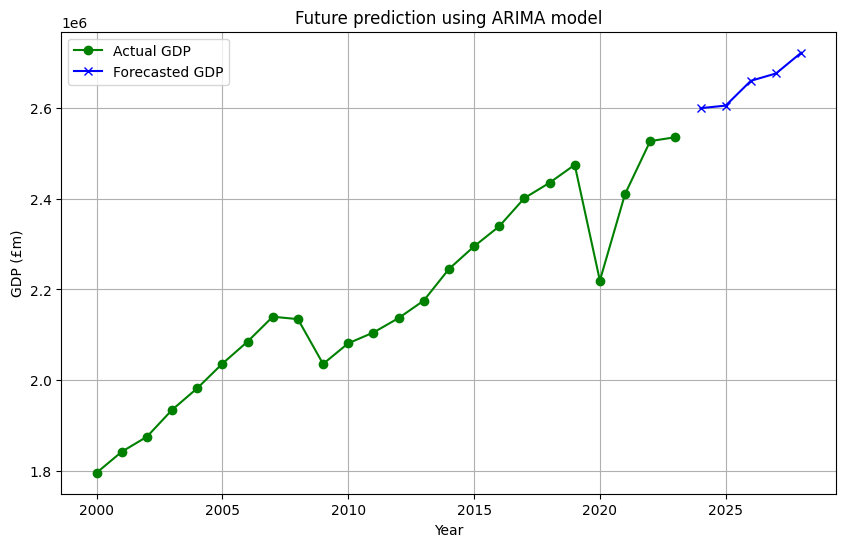

In [75]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load the GDP data
gdpdf = df1['GDP £m']

# Differencing the data to make it stationary
differenced_gdp = df1['Differencing GDP']

p, d, q = 2, 1, 2


# ARIMA model
model = ARIMA(differenced_gdp, order=(p, d, q))
arimapred = model.fit()

print(arimapred.summary())

# Forecasting the next 5 years
forecast = arimapred.forecast(steps=5)

# reverting back to the original data values after differncing the values
lastgdp = gdpdf.iloc[-1]        # last GDP value from the dataset

predictedvalues = [lastgdp + sum(forecast[:i+1]) for i in range(len(forecast))]       # adding the values back like we subtracted in differencing to recover the values

# since the values are in scietific notation, we are returning the values in general format
print("Forecasted GDP values:")
for idx, value in enumerate(predictedvalues):
    year = df1['Year'].iloc[-2] + idx + 1
    print(f"Year {year}: {value:.2f}")

# adding the years
futureyears = [df1['Year'].iloc[-1] + idx + 1 for idx in range(len(forecast))]

# visualising
plt.figure(figsize=(10, 6))
plt.plot(df1['Year'], df1['GDP £m'], label='Actual GDP', marker='o', color='green')
plt.plot(futureyears, predictedvalues, label='Forecasted GDP', marker='x', color='blue')
plt.title('Future prediction using ARIMA model')
plt.xlabel('Year')
plt.ylabel('GDP (£m)')
plt.grid()
plt.legend()
plt.show()


18
23
-83350.46
-16100.23
56898.84
-3217.48
58070.69
27302.46
18    -83350.46
19    -16100.23
20     56898.84
21     -3217.48
22     58070.69
23     27302.46
Name: predicted_mean, dtype: object


f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: ylabel='Density'>

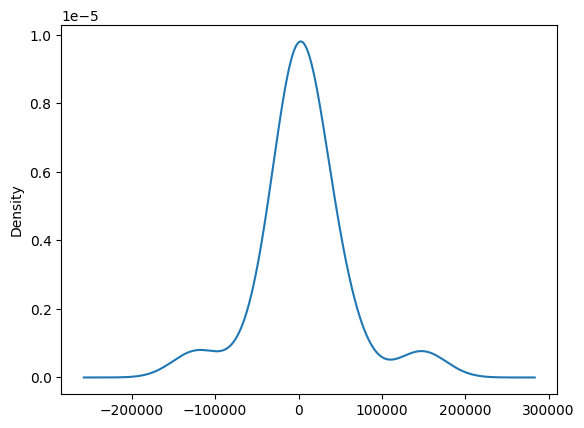

In [19]:
# distribution of the data
pred_start_date = test.index[0]
pred_end_date = test.index[-1]
print(pred_start_date) # 2018
print(pred_end_date) # 2023

# finding the prediction from the test data
pred = modelpred.predict(start=pred_start_date, end=pred_end_date)

# printing the values in normal format
for idx, value in enumerate(pred):
    print(f"{value:.2f}")

# for printing the values in normal, instead of scientific notation
pred1 = pred.apply(lambda x: f"{x:.2f}")
print(pred1)

# residual
residuals = test - pred  
residuals

# visualisation
modelpred.resid.plot(kind='kde')
# this graph will prove that we have taken the correct parameter for ARIMA, resulting in gaussian distribution

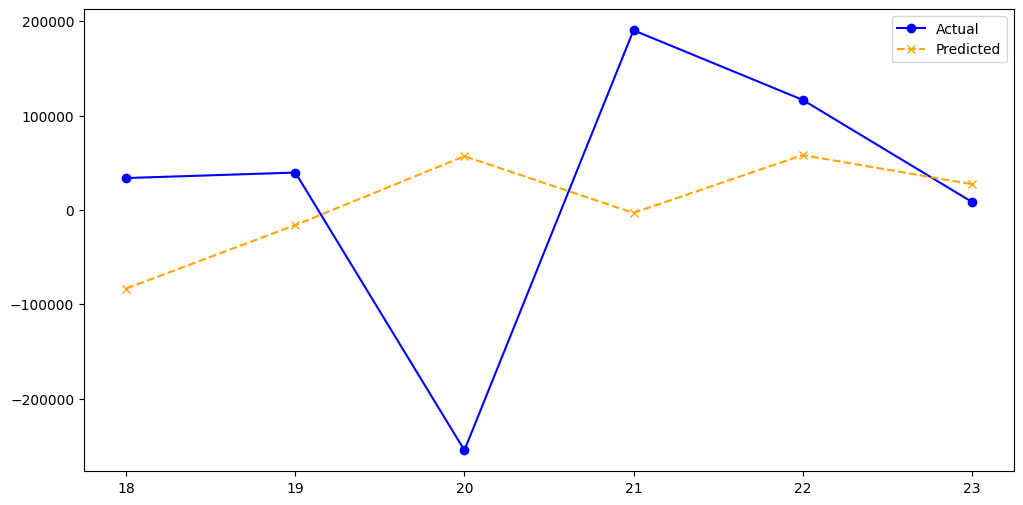

In [20]:
pred_numeric = pred.astype(float)  # Use the original pred Series for plotting
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue', marker='o')
plt.plot(pred.index, pred_numeric, label='Predicted', color='orange', linestyle='--', marker='x')

plt.legend()


## Using Sarimax Model

Define Seasonal Period:

For monthly data with yearly patterns, we set m = 12 (12 months per year).
Seasonal AR (P):

If we set P = 1, the model looks at GDP from 12 months ago to help predict the current month. For instance, January 2020 is influenced by January 2019.
Seasonal Differencing (D):

If GDP has a yearly growth trend, we might need D = 1. This means the model will subtract each month’s GDP from the same month last year to remove the seasonal pattern.
Seasonal MA (Q):

Let’s set Q = 1. This means the model will use forecast errors from last year to adjust predictions. For example, if the GDP in January 2019 was higher than predicted, the model might adjust January 2020’s forecast upward.

f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. Al

Forecasted GDP values:
2575001.00
2554928.00
2441550.00
2472270.00
2481215.00
2498232.00


f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


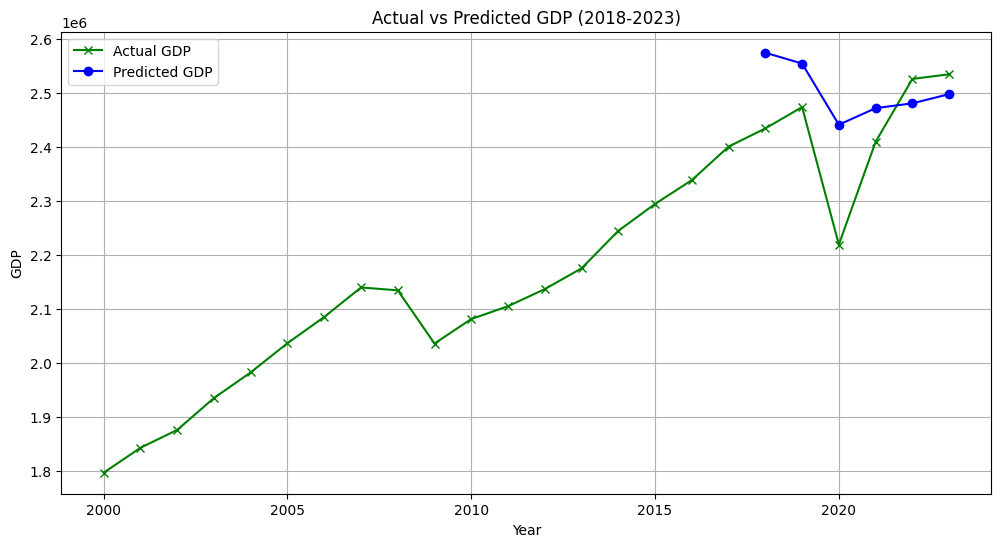

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

gdpdf=df1['GDP £m']

train = df1[df1['Year'] < 2019]['Differencing GDP'].dropna()  # gdp values from 2000 to 2018
test = df1[df1['Year'] > 2017]['Differencing GDP']  # v values from 2019 to 2023
years=df1['Year'].iloc[18:]

# SARIMAX parameters
p, d, q = 2, 1, 5
P, D, Q, m = 2, 1, 5, 12

model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m), 
                enforce_stationarity=False, enforce_invertibility=False)
modelpred = model.fit()

# Forecasting (number of steps equals test set length)
forecast = modelpred.forecast(steps=len(test))

# reverting back to the original data values after differncing the values
lastgdp = gdpdf.iloc[-1]        # last GDP value from the dataset

predicted = [lastgdp + sum(forecast[:i+1]) for i in range(len(forecast))]       # adding the values back like we subtracted in differencing to recover the values

print("Forecasted GDP values:")
for idx, value in enumerate(predicted):
    print(f"{value:.2f}")  # Formatting for better readability

# visualisation
plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['GDP £m'], label='Actual GDP', marker='x',color='green')
plt.plot(years, predicted, label='Predicted GDP', marker='o', color='blue')
plt.title('Actual vs Predicted GDP (2018-2023)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid()
plt.show()

__Future prediction__

f:\viraj\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\viraj\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                   Differencing GDP   No. Observations:                        24
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood      -110748658098802848.000
Date:                            Wed, 06 Nov 2024   AIC                  221497316197605728.000
Time:                                    23:06:21   BIC                  221497316197605728.000
Sample:                                         0   HQIC                 221497316197605696.000
                                             - 24                                              
Covariance Type:                              opg                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.017e-09   1.59e-17   6.41e+07      0.000    1.02e-09    1.02

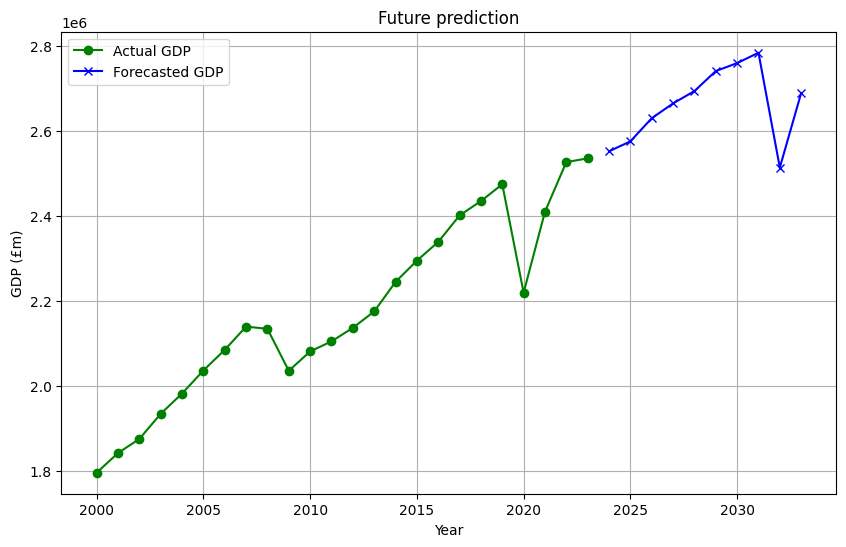

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt



# Differencing the data to make it stationary
differenced_gdp = df1['Differencing GDP']

p, d, q = 2, 1, 2
P, D, Q, m = 2, 1, 2, 12

# ARIMA model
model = SARIMAX(differenced_gdp, order=(p, d, q), seasonal_order=(P, D, Q, m))
sarimapred = model.fit()

print(sarimapred.summary())

# Forecasting the next 5 years
forecast = sarimapred.forecast(steps=10)

# reverting back to the original data values after differncing the values
lastgdp = gdpdf.iloc[-1]        # last GDP value from the dataset

predictedvalues = [lastgdp + sum(forecast[:i+1]) for i in range(len(forecast))]       # adding the values back like we subtracted in differencing to recover the values

# since the values are in scietific notation, we are returning the values in general format
print("Forecasted GDP values:")
for idx, value in enumerate(predictedvalues):
    year = df1['Year'].iloc[-2] + idx + 1
    print(f"Year {year}: {value:.2f}")

# adding the years
futureyears = [df1['Year'].iloc[-1] + idx + 1 for idx in range(len(forecast))]

# visualising
plt.figure(figsize=(10, 6))
plt.plot(df1['Year'], df1['GDP £m'], label='Actual GDP', marker='o', color='green')
plt.plot(futureyears, predictedvalues, label='Forecasted GDP', marker='x', color='blue')
plt.title('Future prediction')
plt.xlabel('Year')
plt.ylabel('GDP (£m)')
plt.grid()
plt.legend()
plt.show()

# The value p>|z| should be less than 0.05 (significant value)
# also the log likelihood should be least but near to 0.


## Regression Model

In [23]:
correlation = df.corr()

targetcol = correlation['GDP £m']
print(targetcol)

Year                                                                     0.951092
CPIH ALL ITEMS                                                           0.934654
United Kingdom population mid-year estimate                              0.949676
Total managed expenditure with respect to GDP                            0.387666
Household final consumption expenditure :National concept CVM SA - £m    0.987706
Bank Rate                                                               -0.425434
RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil     0.043865
RPI:Percentage change over 12 months - Gas                               0.255546
Total EU27_x                                                             0.876180
Total Non EU_x                                                           0.943047
Total Export                                                             0.936879
Total EU27_y                                                             0.970344
Total Non EU_y  

__Scaling the features since GDP can be influenced by features with different units and magnitudes.__

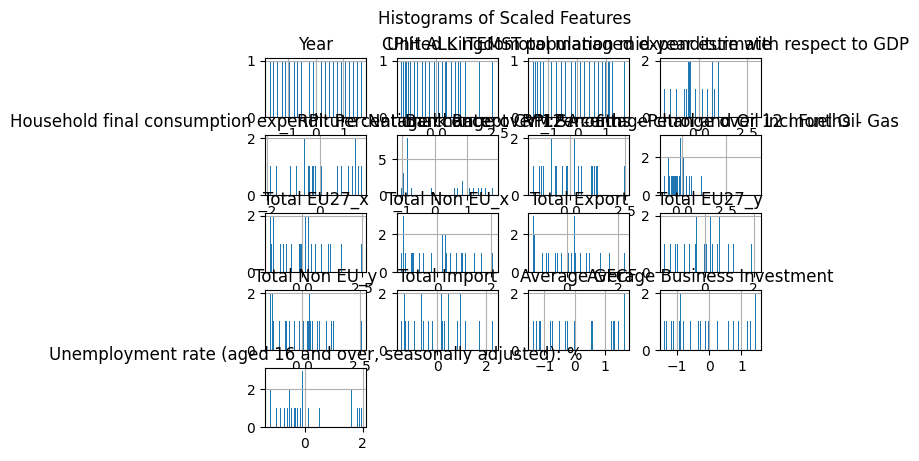

In [24]:
from sklearn.preprocessing import StandardScaler

independentfeature=df.drop(['GDP £m'],axis=1)    # independent features
dependentfeature=df['GDP £m']   # dependent feature
scalerindep=StandardScaler()
scaled_indep=scalerindep.fit_transform(independentfeature) # scaling the values due to different scales

dependentfeature=dependentfeature.values.reshape(-1,1) # reshaping to 2D array
scalardep=StandardScaler()
scaled_dep=scalardep.fit_transform(dependentfeature)   # this will require reshape since it excepts 2D array 

# converting to dataframe
scaleddf=pd.DataFrame(scaled_indep,columns=independentfeature.columns)

# --------------------------------------------------------------------
# visualising the distribution of the data
# normal distribution suggests that the data is symetrically distributed across
# skewness: if histogram shows the skew either left of right, inddicates data is normally distributed
# box plot: detection of outlier can be observed using box plot
figsize=(18,16)
scaleddf.hist(bins=100)
plt.suptitle('Histograms of Scaled Features')
plt.show()


In [25]:
df

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total EU27_x,Total Non EU_x,Total Export,Total EU27_y,Total Non EU_y,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,110685,76139,186824,118975,107664,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,114783,75899,190682,131885,107429,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,115045,72414,187459,141776,100230,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,111256,76627,187883,143112,102066,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,111972,79090,191062,147523,110890,258413,74.00,69.00,4.8,1982500
5,2005,79.404250,60413300,39.9,1123830,4.50,9.8,14.8,121761,90733,212494,162031,124508,286539,77.00,74.50,4.8,2036675
6,2006,81.356333,60827100,39.9,1133245,5.00,6.0,31.9,154209,92209,246418,188480,140199,328679,79.25,78.25,5.4,2085162
7,2007,83.305000,61319100,40.2,1171806,5.50,2.5,7.7,128765,94060,222825,173818,142573,316391,82.50,85.00,5.3,2139895
8,2008,86.222583,61823800,43.5,1162090,2.00,16.7,19.8,142261,110332,252593,185623,163008,348631,80.00,82.00,5.7,2134571
9,2009,87.933417,62260500,46.3,1124339,0.50,-8.8,13.7,125893,102058,227951,167776,149431,317207,70.25,68.25,7.6,2035942


__Model training__

R2 Score:  0.9800301384971921
Mean Absolute Error:  23537.631140260055
MAE in percent: 1.08%


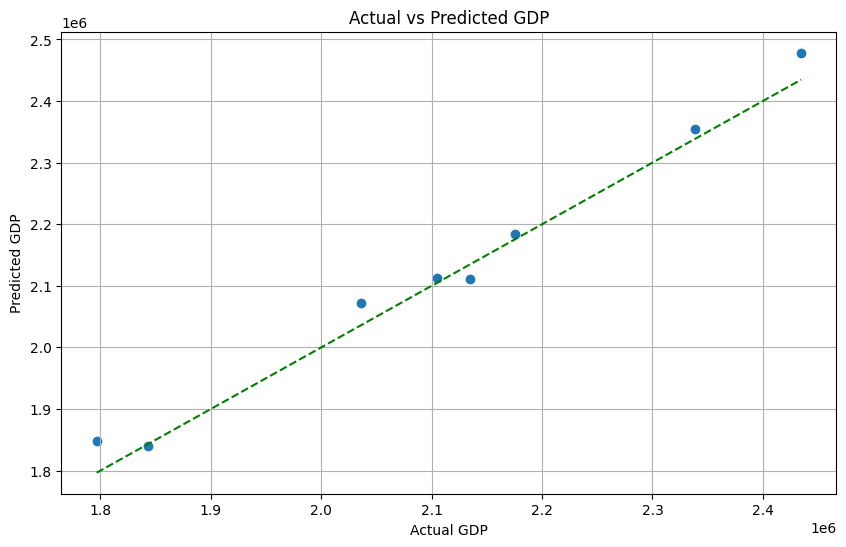

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_indep, scaled_dep, test_size=0.33, random_state=42)

# training the model
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

# X_train holds the training data values of independent feature
# X_test holds the test data values of independent feature
# y_train holds the train data values of dependent feature
# y_test holds the test data values of dependent feature

# making prediction
y_pred=linear_model.predict(X_test) 


# transfomring the values back to original scales
y_pred1=scalardep.inverse_transform(y_pred)
# print(y_pred1)
y_test1=scalardep.inverse_transform(y_test)
# print(y_test1)

# measuring the accuracy of the prediction
r2score=r2_score(y_test1,y_pred1)
meangdp = df['GDP £m'].mean()
mae=mean_absolute_error(y_test1,y_pred1)
print("R2 Score: ",r2score)
print("Mean Absolute Error: ",mae)
print("MAE in percent: {:.2f}%".format((mae/meangdp)*100))
# visualisation of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1)
plt.plot([min(y_test1), max(y_test1)],
         [min(y_test1), max(y_test1)],
         ls='--', color='green')  # Diagonal line for reference
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.grid()
plt.show()

__Predicting future independent columns__

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your dataset
data = df

# Step 1: Define the year range for predictions
future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 6).reshape(-1, 1)  # Next 5 years

# Step 2: Define a function to estimate future values for a feature
def estimate(feature_name):
    X = data['Year'].values.reshape(-1, 1)
    y = data[feature_name].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_values = model.predict(future_years)
    return future_values

# estimation of the all the values
estimated_cpi_values = estimate('CPIH ALL ITEMS')
estimated_population = estimate('United Kingdom population mid-year estimate')
estimated_expenditure = estimate('Total managed expenditure with respect to GDP')
estimated_household = estimate('Household final consumption expenditure :National concept CVM SA - £m')
estimated_bank = estimate('Bank Rate')
estimated_eenergy = estimate('RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil')
estimated_gas = estimate('RPI:Percentage change over 12 months - Gas')
estimated_eu27 = estimate('Total EU27_x')
estimated_noneu = estimate('Total Non EU_x')
estimated_export = estimate('Total Export') 
estimated_eu27y = estimate('Total EU27_y')
estimated_eu = estimate('Total Non EU_y')
estimated_import = estimate('Total Import')
estimated_gfcf = estimate('Average GFCF')
estimated_businessinvest = estimate('Average Business Investment')
estimated_unemployment = estimate('Unemployment rate (aged 16 and over, seasonally adjusted): %')


# storing the values in the dataframe
estimate_indep = pd.DataFrame({
    'Year': future_years.flatten(),
    'CPIH ALL ITEMS': estimated_cpi_values,
    'United Kingdom population mid-year estimate': estimated_population,
    'Total managed expenditure with respect to GDP': estimated_expenditure,
    'Household final consumption expenditure :National concept CVM SA - £m':estimated_household,
    'Bank Rate':estimated_bank,
    'RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil':estimated_eenergy,
    'RPI:Percentage change over 12 months - Gas':estimated_gas,
    'Total EU27_x':estimated_eu27,
    'Total Non EU_x':estimated_noneu,
    'Total Export':estimated_export,
    'Total EU27_y':estimated_eu27y,
    'Total Non EU_y':estimated_eu,
    'Total Import':estimated_import,
    'Average GFCF':estimated_gfcf,
    'Average Business Investment':estimated_businessinvest,
    'Unemployment rate (aged 16 and over, seasonally adjusted): %':estimated_unemployment
})


# estimate_indep['United Kingdom population mid-year estimate'] = future_data['United Kingdom population mid-year estimate'].astype(int)
# estimate_indep['Household final consumption expenditure :National concept CVM SA - £m'] = future_data['Household final consumption expenditure :National concept CVM SA - £m'].astype(float).apply(lambda x: f'{x:.2f}')
estimate_indep=estimate_indep.style.format("{:.2f}")
estimate_indep

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total EU27_x,Total Non EU_x,Total Export,Total EU27_y,Total Non EU_y,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
0,2024.00,120.57,68661277.54,45.88,1387637.26,0.15,3.34,15.42,183280.47,212200.46,395480.93,297725.47,281805.76,579531.23,99.59,104.34,4.85
1,2025.00,122.68,69083227.41,46.20,1403220.55,-0.01,3.29,15.91,186340.18,218519.40,404859.58,305020.47,289779.79,594800.26,100.96,105.87,4.80
2,2026.00,124.79,69505177.28,46.52,1418803.84,-0.18,3.24,16.40,189399.88,224838.35,414238.23,312315.46,297753.83,610069.28,102.34,107.40,4.75
3,2027.00,126.89,69927127.14,46.84,1434387.13,-0.35,3.19,16.89,192459.58,231157.30,423616.87,319610.45,305727.86,625338.31,103.71,108.93,4.70
4,2028.00,129.00,70349077.01,47.16,1449970.42,-0.51,3.14,17.38,195519.28,237476.24,432995.52,326905.44,313701.89,640607.33,105.08,110.46,4.64


__Predicting target column__

In [28]:
columns=estimate_indep.columns

# to scalar the values
estimate_data=estimate_indep.data[columns]



# # train test split
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_indep, scaled_dep, test_size=0.33, random_state=42)
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)

# using previous scalar whihc was defined for 
scaledindep_feat=scalerindep.transform(estimate_data)

# making prediction
futuregdp=linear_model.predict(scaledindep_feat)
futuregdp

# transforming the values back to its original
futuregdp = scalardep.inverse_transform(futuregdp)
futuregdp

# displaying the float numbers, instead of scientific notation
pd.options.display.float_format = '{:.2f}'.format

futuregpd_df=pd.DataFrame({
    'Year': estimate_data['Year'],
    'Predicted GDP £m':futuregdp.flatten()
})
futuregpd_df

,Year,Predicted GDP £m
0,2024,2542316.23
1,2025,2571108.52
2,2026,2599900.80
3,2027,2628693.08
4,2028,2657485.37


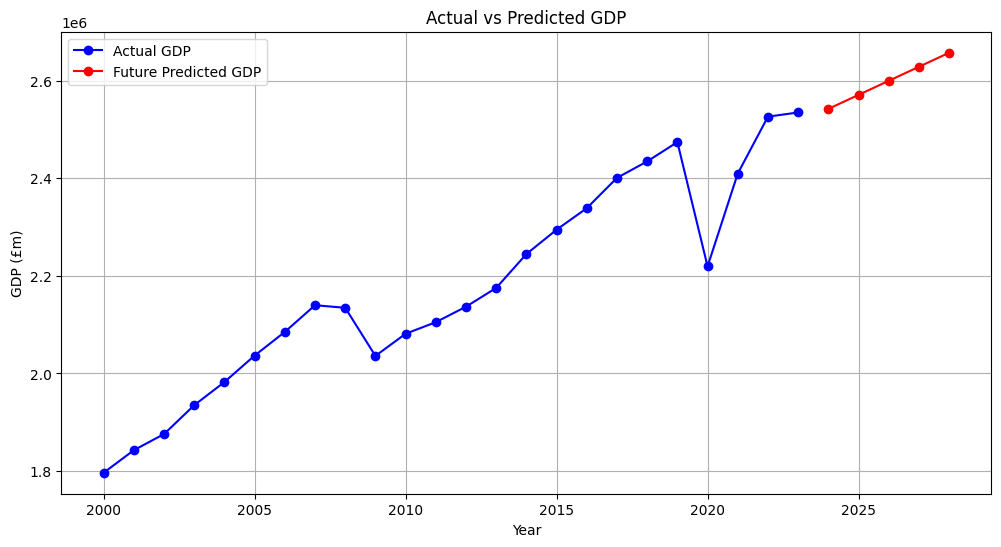

In [29]:
# Visualisation
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(df['Year'], df['GDP £m'], label='Actual GDP', color='blue', marker='o')
plt.plot(future_years, futuregdp, label='Future Predicted GDP', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('GDP (£m)')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.grid()

In [30]:
# conclusion: model has learned a linear trend based on the training data. it will predict a straight line since its linear regression.


## VAR (Vector Auto-Regression) Model

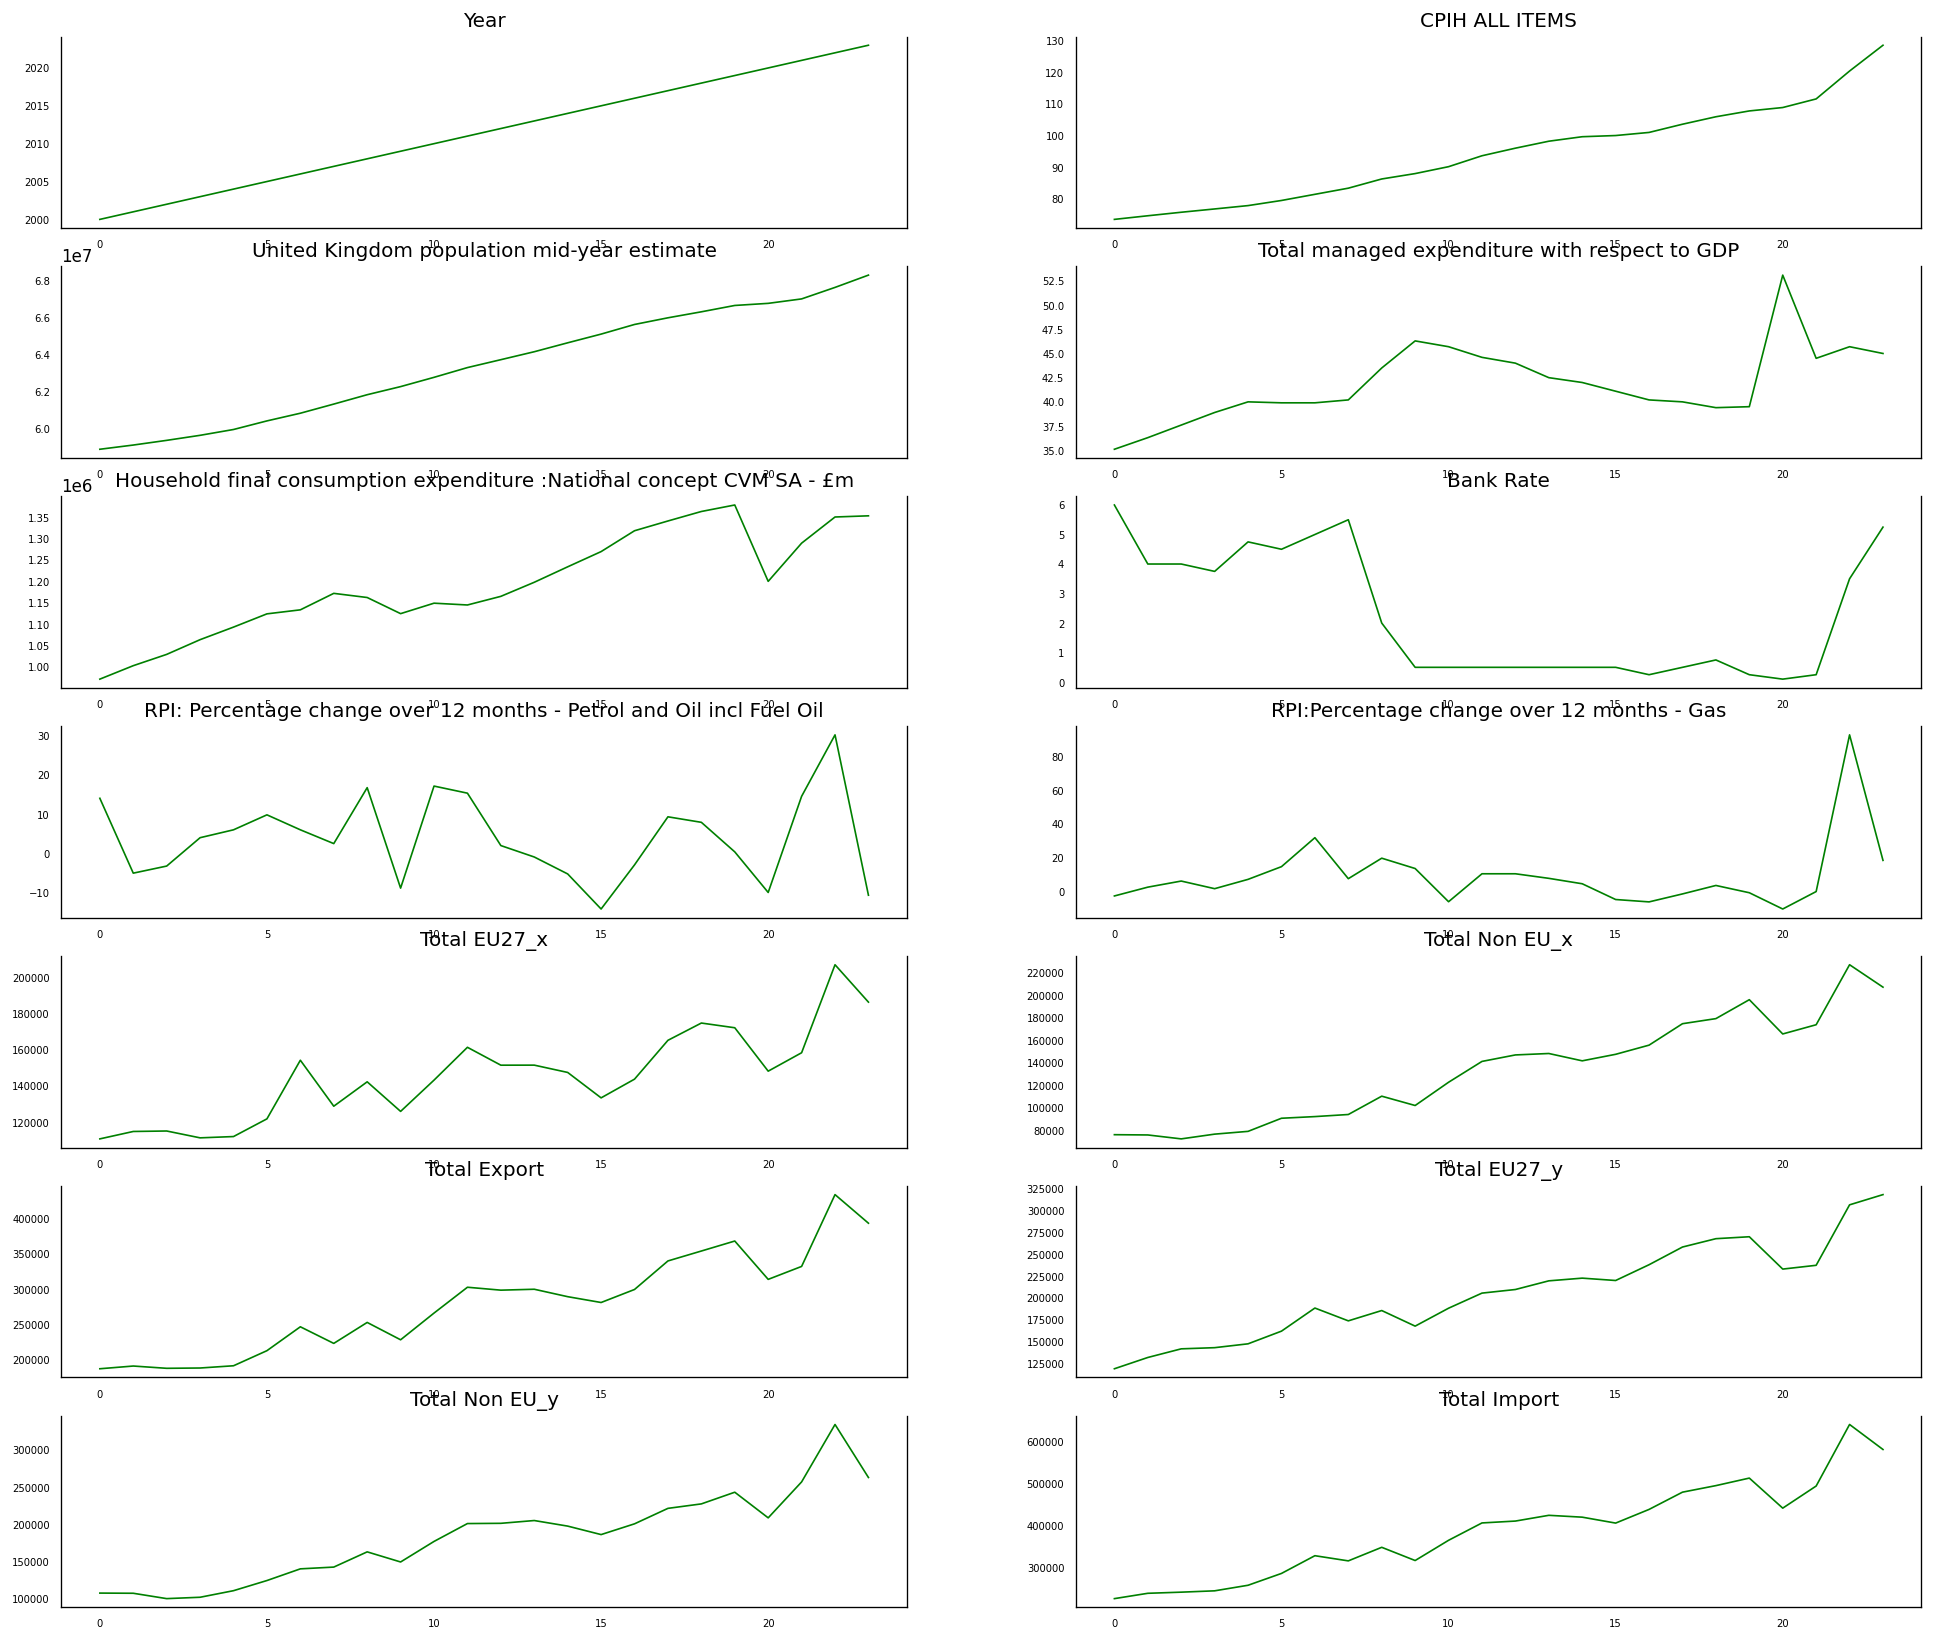

In [31]:
# axes is the array which consist of column names 
fig,axes=plt.subplots(nrows=7,ncols=2,dpi=120,figsize=(20,17))
for i, ax  in enumerate(axes.flatten()):
    data=df[df.columns[i]]
    ax.plot(data,color='green',linewidth=1)
    # decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

#  below graph will help in observing the relationship of each columns, making it suitable to find which column has the similarly graph.


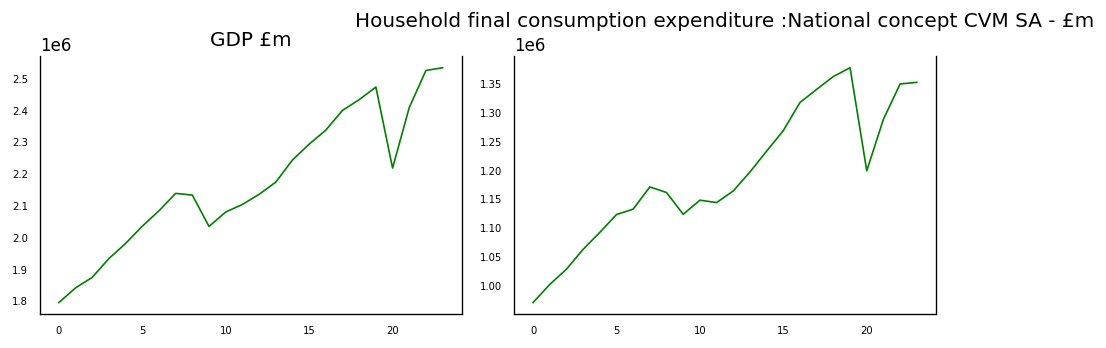

In [32]:
# axes is the array which consist of column names 

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(8, 3))

for ax, column in zip(axes, ['GDP £m', 'Household final consumption expenditure :National concept CVM SA - £m']):
    ax.plot(df[column], color='green', linewidth=1)  # Plotting the column data

    # Decorations
    ax.set_title(column)  # Set title for the specific column
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#  below graph will help in observing the relationship of each columns, making it suitable to find which column has the similarly graph.


In [33]:
# def adfuller_check(series):
#     results = adfuller(series)
#     # return result[1] <= 0.05  # True if stationary, False if non-stationary
#     labels = ['ADF Test Statistic', 'p-value', 'No. of Lags Used', 'No. of Observations']
    
#     # we are combining both the results and lables
#     for result, label in zip(results, labels):
#         # print(label + " : " + str(result))
#         print("")

    
#     # checking if the p value is less than 0.05 or more than 0.05
#     if results[1] <= 0.05:  # p-value obtained directly from results
#         print("Reject Null Hypothesis: Data is stationary")
#     else:
#         print("Fail to Reject Null Hypothesis: Data is non-stationary")
    
#     return results

# # Differencing the entire DataFrame
# for column in data.columns:
#     if not adfuller_check(data[column]):
#         data[column] = data[column].diff().dropna()  # Difference the column
#         print(data[column])

In [34]:
from statsmodels.tsa.stattools import adfuller

# Define the function to perform the ADF test
def adfuller_check(GDP):
    results = adfuller(GDP)  # Perform the ADF test
    labels = ['ADF Test Statistic', 'p-value', 'No. of Lags Used', 'No. of Observations']
    
    # we are combining both the results and lables
    for result, label in zip(results, labels):
        print(label + " : " + str(result))
    
    # checking if the p value is less than 0.05 or more than 0.05
    if results[1] <= 0.05:  # p-value obtained directly from results
        print("Reject Null Hypothesis: Data is stationary")
    else:
        
        print("Fail to Reject Null Hypothesis: Data is non-stationary")

# passing all the columns to check the stationarity
for cols in df.columns:
    # adfuller_check(df['GDP £m'])
    if cols =='Year':
        continue
    else:
        print(cols)
        adfuller_check(df[cols])
        print("\n")

# df['RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil']
# df['United Kingdom population mid-year estimate']

CPIH ALL ITEMS
ADF Test Statistic : 1.3817469940377514
p-value : 0.9970296231995969
No. of Lags Used : 9
No. of Observations : 14
Fail to Reject Null Hypothesis: Data is non-stationary


United Kingdom population mid-year estimate
ADF Test Statistic : -2.923678088661023
p-value : 0.04266303121158502
No. of Lags Used : 8
No. of Observations : 15
Reject Null Hypothesis: Data is stationary


Total managed expenditure with respect to GDP
ADF Test Statistic : -2.065969647846698
p-value : 0.25841663251920055
No. of Lags Used : 9
No. of Observations : 14
Fail to Reject Null Hypothesis: Data is non-stationary


Household final consumption expenditure :National concept CVM SA - £m
ADF Test Statistic : -1.4804154139332626
p-value : 0.5431763533885691
No. of Lags Used : 0
No. of Observations : 23
Fail to Reject Null Hypothesis: Data is non-stationary


Bank Rate
ADF Test Statistic : -1.6780713697078806
p-value : 0.44244470253065804
No. of Lags Used : 0
No. of Observations : 23
Fail to Reject Null

__my way of writing the code for finding the order for stationarity__

In [35]:
df=df.drop(['Total EU27_y','Total Non EU_y','Total EU27_x','Total Non EU_x','Unemployment rate (aged 16 and over, seasonally adjusted): %'],axis=1)
df

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,GDP £m
0,2000,73.41,58886100,35.10,971050,6.00,14.00,-2.50,186824,226639,67.75,74.25,1796500
1,2001,74.56,59113000,36.30,1002536,4.00,-5.00,2.70,190682,239314,69.00,74.00,1842720
2,2002,75.67,59365700,37.60,1028983,4.00,-3.20,6.30,187459,242006,70.50,72.25,1875809
3,2003,76.72,59636700,38.90,1063424,3.75,4.00,1.80,187883,245178,71.75,71.50,1934941
4,2004,77.78,59950400,40.00,1092834,4.75,6.00,7.30,191062,258413,74.00,69.00,1982500
5,2005,79.40,60413300,39.90,1123830,4.50,9.80,14.80,212494,286539,77.00,74.50,2036675
6,2006,81.36,60827100,39.90,1133245,5.00,6.00,31.90,246418,328679,79.25,78.25,2085162
7,2007,83.30,61319100,40.20,1171806,5.50,2.50,7.70,222825,316391,82.50,85.00,2139895
8,2008,86.22,61823800,43.50,1162090,2.00,16.70,19.80,252593,348631,80.00,82.00,2134571
9,2009,87.93,62260500,46.30,1124339,0.50,-8.80,13.70,227951,317207,70.25,68.25,2035942


In [36]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# def adfullercheck(values):
#     results = adfuller(values.dropna())  # Perform the ADF test
#     labels = ['ADF Test Statistic', 'p-value', 'No. of Lags Used', 'No. of Observations']
    
#     # we are combining both the results and lables
#     for result, label in zip(results, labels):
#         print(label + " : " + str(result))

#     return results[1]<0.05

def adfuller_check(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Returns True if stationary
    

differencingdf1=pd.DataFrame()
tempdf=pd.DataFrame
diffnums={}   # city bank

# tempcols=pd.DataFrame()

for col in df.columns:
    if col=='Year':
        differencingdf1[col]=df[col]    # copying the year data into the new dataframe
        diffnums[col]=0   # no differncing required
        continue
    else:
        tempvalues=df[col].copy()  # creating a temporary variable to store only the values of the original dataframe
        
        ordercnt=0      # differencing count required
        # how many times are the differencing required for each column
        while not adfuller_check(tempvalues):
            tempvalues=tempvalues.diff().dropna()
            ordercnt+=1
        # print(ordercnt)
        # key value pair for column and number of differencing
        diffnums[col]=ordercnt

for col,numtimes in diffnums.items():
    print(col,numtimes)
    if numtimes==0:
        # no differencing
        differencingdf1[col]=df[col]
    else:
        tempvalues=df[col]
        for i in range(numtimes):
            tempvalues=tempvalues.diff()    # applying differencing based on the ordercnt/numtimes
        differencingdf1[col]=tempvalues.bfill()     # replacing the copied dataset values with the differencing and forward filling the nan values and backward filling the nan values.
        # this will fill up the intial values which are NaN 
# ------------------------------------------------

# differencingdf1=differencingdf1.dropna()
for col in differencingdf1.columns:
    if col != 'Year':
        print(f"Checking stationarity for {col}")
        print("Stationary" if adfuller_check(differencingdf1[col]) else "Non-stationary")

# differencingdf1

Year 0
CPIH ALL ITEMS 2
United Kingdom population mid-year estimate 0
Total managed expenditure with respect to GDP 1
Household final consumption expenditure :National concept CVM SA - £m 1
Bank Rate 1
RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil 0
RPI:Percentage change over 12 months - Gas 1
Total Export 1
Total Import 4
Average GFCF 1
Average Business Investment 1
GDP £m 1
Checking stationarity for CPIH ALL ITEMS
Stationary
Checking stationarity for United Kingdom population mid-year estimate
Stationary
Checking stationarity for Total managed expenditure with respect to GDP
Stationary
Checking stationarity for Household final consumption expenditure :National concept CVM SA - £m
Stationary
Checking stationarity for Bank Rate
Stationary
Checking stationarity for RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil
Stationary
Checking stationarity for RPI:Percentage change over 12 months - Gas
Stationary
Checking stationarity for Total Export
Sta

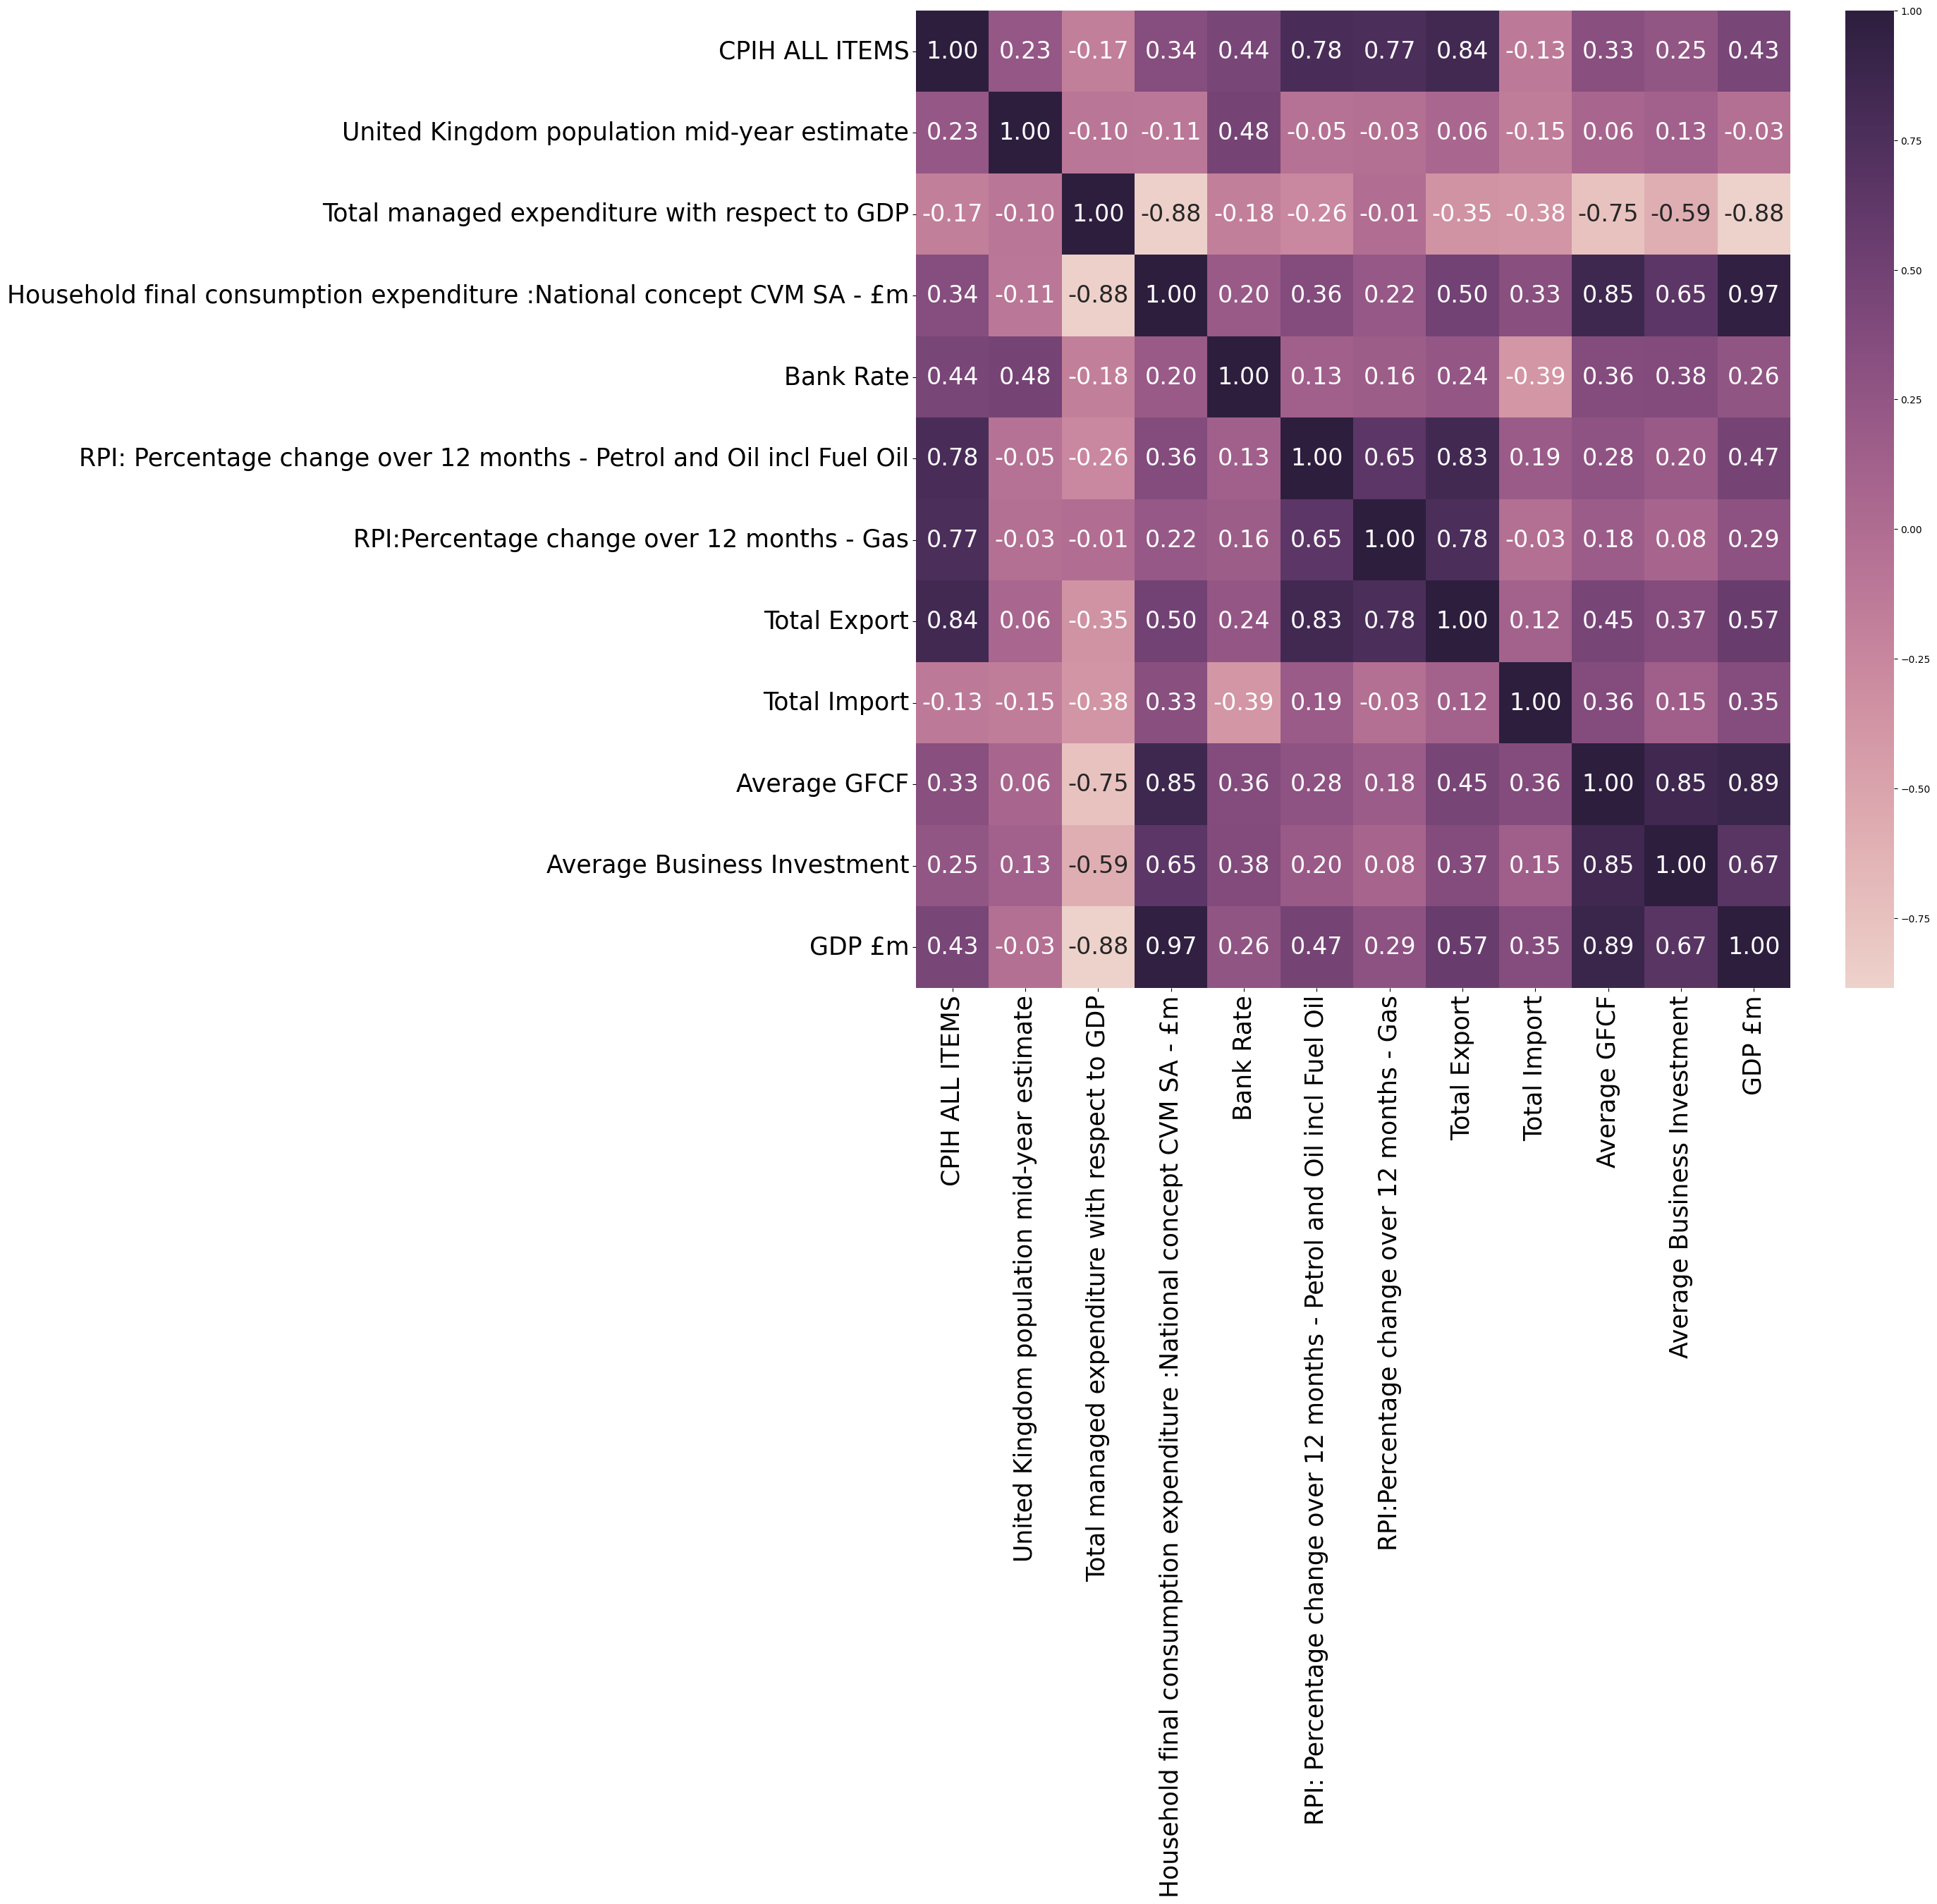

In [37]:
corrmatrix = differencingdf1.drop(columns=['Year']).corr()
plt.figure(figsize=(20,18))
sns.heatmap(corrmatrix,annot=True,fmt='.2f',cmap=sns.cubehelix_palette(as_cmap=True),
annot_kws={"size":24})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [38]:
# from statsmodels.tsa.vector_ar.var_model import VAR
# import pandas as pd
# import matplotlib.pyplot as plt

# y=differencingdf1['GDP £m']
# # multiple columns for the prediction
# multivariatedata=differencingdf1[differencingdf1.columns]

# # lag selection based on AIC, BIC
# # AIC & BIC: AIC determines model fit, complexity & BIC determines better model with a stronger penalty
# model=VAR(multivariatedata)
# lagorder=model.select_order()
# optimallag=lagorder.aic     # select the lag with lowest AIC & BIC
# varmodel=model.fit(optimallag)

# # forecast for the next 5 years
# forecaststeps=5

# lastval=multivariatedata.values[-optimallag:]

# # endog will treat all the column as necessary feature
# forecast=varmodel.forecast(lastval,steps=forecaststeps)

# # convert the forecast into df
# # forecast_index = pd.RangeIndex(start=multivariatedata.index[-1] + 1, stop=multivariatedata.index[-1] + 1 + forecaststeps)
# # forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=multivariatedata.columns)
# # print(forecast_df)





__Below codes will show the way of using the VAR model for youtube version__

_https://www.youtube.com/watch?v=4jv1NGlAc_0_

__After making the columns stationary, now we are using VAR model__

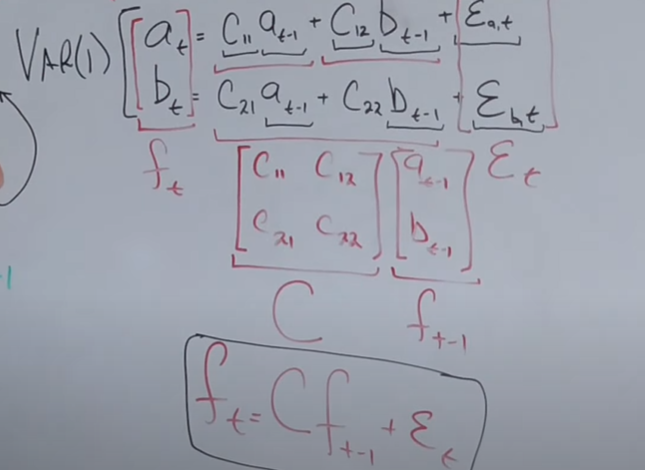

_This is the formation of the formula for model._
_The above is an exmaple where we are comparing the sales of the fruit (i.e. apple and banana) with the previous month._


__Multivariate time series__ is predicting multiple target variables at the same time.

__AR and MA model__

__AR model__ forecasts a series based solely on the past values in the series - called __lags__

__MA__ forecasts based solely on the past errors in the series - called __error lags.__

__Vector AutoRegreesive Model__
Extension of ARMA model

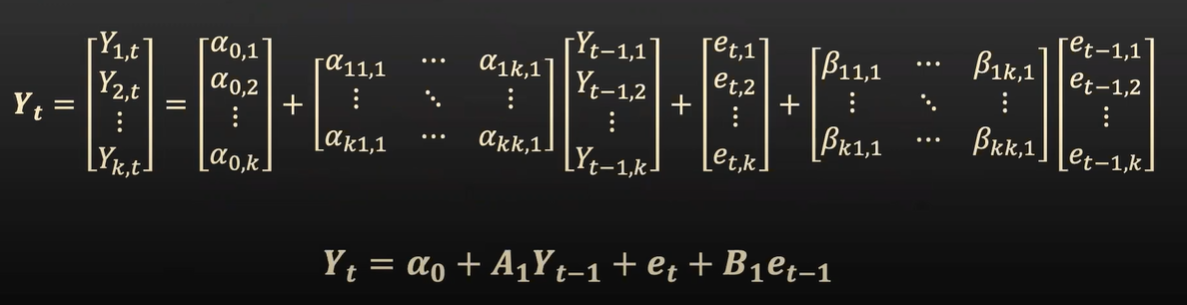

The fomula has the current value of the target variable and previous value of the target variable, allowing the model to learn and analyze the pattern.

__VAR model__ calculates the future values of a variable based on its previous time lag and the previous time lag of some other variable.
For instance consider an example where we use the past value of the sales data and past value of other variables (like advertising spend) to predict the future sales.
In this way its easier to understand how these variables influence each other over time.


In [39]:
differencingdf1

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,GDP £m
0,2000,-0.03,58886100,1.20,31486.00,-2.00,14.00,5.20,3858.00,-880.00,1.25,-0.25,46220.00
1,2001,-0.03,59113000,1.20,31486.00,-2.00,-5.00,5.20,3858.00,-880.00,1.25,-0.25,46220.00
2,2002,-0.03,59365700,1.30,26447.00,0.00,-3.20,3.60,-3223.00,-880.00,1.50,-1.75,33089.00
3,2003,-0.07,59636700,1.30,34441.00,-0.25,4.00,-4.50,424.00,-880.00,1.25,-0.75,59132.00
4,2004,0.02,59950400,1.10,29410.00,1.00,6.00,5.50,3179.00,-880.00,2.25,-2.50,47559.00
5,2005,0.56,60413300,-0.10,30996.00,-0.25,9.80,7.50,21432.00,-4755.00,3.00,5.50,54175.00
6,2006,0.33,60827100,0.00,9415.00,0.50,6.00,17.10,33924.00,-5705.00,2.25,3.75,48487.00
7,2007,-0.00,61319100,0.30,38561.00,0.50,2.50,-24.20,-23593.00,-67565.00,3.25,6.75,54733.00
8,2008,0.97,61823800,3.30,-9716.00,-3.50,16.70,12.10,29768.00,167398.00,-2.50,-3.00,-5324.00
9,2009,-1.21,62260500,2.80,-37751.00,-1.50,-8.80,-6.10,-24642.00,-207148.00,-9.75,-13.75,-98629.00


In [40]:
# now we will check whether the column has the correlation using grauger casuality test
# from the visualisation we can observe that household infal consumption and averge gfcf are highly correlated
from statsmodels.tsa.stattools import grangercausalitytests
print("CPIH ALL ITEMS causes UK Population?")
grauger1 = grangercausalitytests(differencingdf1[['GDP £m', 'Household final consumption expenditure :National concept CVM SA - £m']], maxlag=7)
print("----------------------")
print('UK Population causes CPIH ALL ITEMS?')
grauger2=grangercausalitytests(differencingdf1[['Household final consumption expenditure :National concept CVM SA - £m', 'GDP £m']],maxlag=7)

# the p value should be less than 0.05, then it means that the ulc hypothesis is true
# hence to observe the value less than 0.05, then we can increase the value of maxlags.


CPIH ALL ITEMS causes UK Population?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1416  , p=0.7107  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=0.1628  , p=0.6865  , df=1
likelihood ratio test: chi2=0.1623  , p=0.6871  , df=1
parameter F test:         F=0.1416  , p=0.7107  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3208  , p=0.7299  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=0.8302  , p=0.6603  , df=2
likelihood ratio test: chi2=0.8149  , p=0.6653  , df=2
parameter F test:         F=0.3208  , p=0.7299  , df_denom=17, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8590  , p=0.4851  , df_denom=14, df_num=3
ssr based chi2 test:   chi2=3.8656  , p=0.2763  , df=3
likelihood ratio test: chi2=3.5482  , p=0.3146  , df=3
parameter F test:         F=0.8590  , p=0.4851  , df_denom=14, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:

__We will split the data into Train and Test__

In [41]:
# these 2 columns are highly related to each other, as their inclination of the graph is almost identical

# reading the gdp data to obtain the entire dataset value
gdp=pd.read_csv('alldata.csv')
gdp=gdp.drop(gdp.index[:7])
gdp.rename(columns={'Title':'Year','Gross Domestic Product: chained volume measures: Seasonally adjusted £m':'GDP £m'},inplace=True)
gdp['Year'] = gdp['Year'].astype(int)  # Convert to int if it's not already
# reading the household data to obtain the entire dataset value
household_data=pd.read_csv('data/household consumption.csv')
household_data=household_data.drop(household_data.index[:14])
household_data.rename(columns={'Title':'Year'},inplace=True)
household_data['Year'] = household_data['Year'].astype(int)  # Ensure it's int

# combining the dataframes, where outer will keep all the data
combined_data=pd.merge(gdp,household_data,on='Year',how='outer')


demodata=combined_data[['GDP £m', 'Household final consumption expenditure :National concept CVM SA - £m']]

demodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   GDP £m                                                                 69 non-null     int64 
 1   Household final consumption expenditure :National concept CVM SA - £m  69 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [42]:
demodata['GDP £m'] = pd.to_numeric(demodata['GDP £m'], errors='coerce')
demodata['Household final consumption expenditure :National concept CVM SA - £m'] = pd.to_numeric(demodata['Household final consumption expenditure :National concept CVM SA - £m'], errors='coerce')


demodata

C:\Users\sanja\AppData\Local\Temp\ipykernel_26584\1311819406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demodata['GDP £m'] = pd.to_numeric(demodata['GDP £m'], errors='coerce')
C:\Users\sanja\AppData\Local\Temp\ipykernel_26584\1311819406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demodata['Household final consumption expenditure :National concept CVM SA - £m'] = pd.to_numeric(demodata['Household final consumption expenditure :National concept CVM SA - £m'], errors='coerce')


,GDP £m,Household final consumption expenditure :National concept CVM SA - £m
0,544215,269105
1,553423,271032
2,564307,277222
3,571904,285421
4,596321,298134
...,...,...
64,2474245,1378649
65,2219474,1199896
66,2409815,1289290
67,2526428,1350539


In [43]:
traindemo=demodata[:-8]
# remaining values are the train data
testdemo=demodata[-8:]
# last 8 values are the test data

In [44]:
traindemo

,GDP £m,Household final consumption expenditure :National concept CVM SA - £m
0,544215,269105
1,553423,271032
2,564307,277222
3,571904,285421
4,596321,298134
...,...,...
56,2105105,1144605
57,2136871,1164814
58,2175333,1197761
59,2244827,1233950


_How many number of lags to be considered?_

In [45]:
from statsmodels.tsa.api import VAR

model=VAR(traindemo.diff()[1:])


In [46]:
traindemo

,GDP £m,Household final consumption expenditure :National concept CVM SA - £m
0,544215,269105
1,553423,271032
2,564307,277222
3,571904,285421
4,596321,298134
...,...,...
56,2105105,1144605
57,2136871,1164814
58,2175333,1197761
59,2244827,1233950


In [47]:
sortedrorder=model.select_order(maxlags=19)
print(sortedrorder.summary())
# we can also only focus on the AIC column, where we find the lowest value which is automatically highlighted

# since we have the maxlag as 4, this means that using the formula we will be going previous 4 years values. 
# this means that in the formula t-1,t-2,t-3,t-4


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        38.70       38.78   6.397e+16       38.73
1        38.66       38.91   6.147e+16       38.75
2        38.37       38.79   4.630e+16       38.52
3        38.43       39.01   4.926e+16       38.64
4        38.44       39.19   5.016e+16       38.71
5        38.50       39.42   5.377e+16       38.83
6        38.66       39.74   6.424e+16       39.05
7        38.70       39.95   6.866e+16       39.15
8        38.60       40.02   6.437e+16       39.11
9        38.65       40.24   7.112e+16       39.23
10       38.69       40.44   7.861e+16       39.33
11       38.74       40.67   8.978e+16       39.44
12       38.40       40.49   7.028e+16       39.16
13       37.89       40.14   4.822e+16       38.71
14       37.70       40.12   4.736e+16       38.58
15       37.74       40.33   6.187e+16       38.68
16       37.73       40.48   8.

In [48]:
# converting to float to avoid conversion error
traindemo = traindemo.astype(float)

__Fit the model__

In [49]:
from statsmodels.tsa.statespace.varmax import VARMAX
# order p,q is set to 4,0, and the enforce_stationary ensures the data is statinary, hence we are not using the differencingdf1 dataframe in training data
varmodel = VARMAX(traindemo, order=(4, 0), enforce_stationarity=True)
fittedmodel = varmodel.fit(disp=False)
print(fittedmodel.summary())

# below output shows the minimum AIC, BIC and HQIC scores
# also the l1 l2 l3 l4 are nothing but the lags.
# these values shows the dependency of the previous lags or previous values



                                                            Statespace Model Results                                                           
Dep. Variable:     ['GDP £m', 'Household final consumption expenditure :National concept CVM SA - £m']   No. Observations:                   61
Model:                                                                                          VAR(4)   Log Likelihood               -1331.179
                                                                                           + intercept   AIC                           2704.359
Date:                                                                                 Wed, 06 Nov 2024   BIC                           2748.687
Time:                                                                                         20:54:34   HQIC                          2721.731
Sample:                                                                                              0                                  

f:\viraj\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


__Prediction__

In [50]:
nforecast=8
predict=fittedmodel.get_prediction(start=len(traindemo), end=len(traindemo)+nforecast-1)
predictions=predict.predicted_mean

In [51]:
predictions.columns=['GDP £m_pred', 'Household final consumption expenditure :National concept CVM SA - £m_pred']
predictions

# these are predictions for the CPIH and UK population

,GDP £m_pred,Household final consumption expenditure :National concept CVM SA - £m_pred
61,2360158.50,1310446.90
62,2418786.03,1344950.52
63,2477995.39,1381993.93
64,2539368.94,1418772.83
65,2594508.37,1453223.78
66,2649540.82,1487879.67
67,2703300.34,1521108.80
68,2755113.92,1553588.20


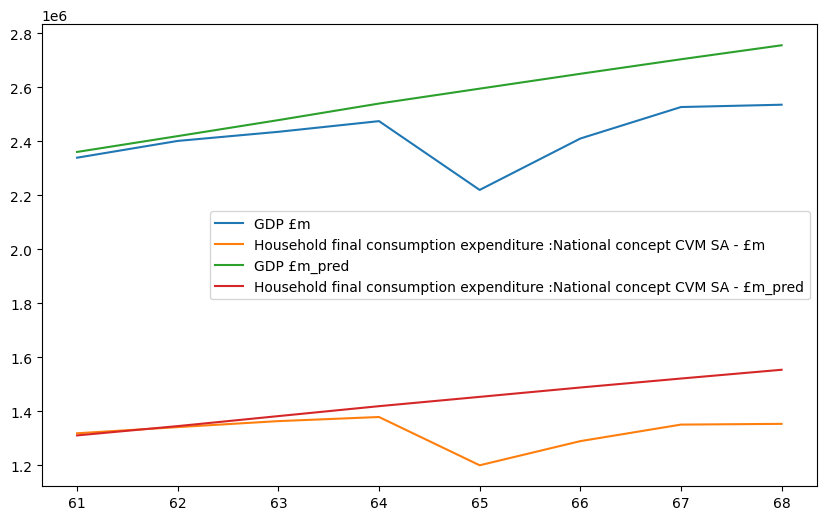

In [52]:
testvspred=pd.concat([testdemo,predictions],axis=1)
testvspred.plot(figsize=(10,6))
plt.legend()
plt.show()

In [53]:
predictions

,GDP £m_pred,Household final consumption expenditure :National concept CVM SA - £m_pred
61,2360158.50,1310446.90
62,2418786.03,1344950.52
63,2477995.39,1381993.93
64,2539368.94,1418772.83
65,2594508.37,1453223.78
66,2649540.82,1487879.67
67,2703300.34,1521108.80
68,2755113.92,1553588.20


__Evaluation__

In [54]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_gdp=math.sqrt(mean_squared_error(predictions['GDP £m_pred'],testdemo['GDP £m']))
print('Mean value of GDP is : {}. Root Mean Squared Error is :{}'.format(mean(testdemo['GDP £m']),rmse_gdp))

rmse_household=math.sqrt(mean_squared_error(predictions['Household final consumption expenditure :National concept CVM SA - £m_pred'],testdemo['Household final consumption expenditure :National concept CVM SA - £m']))
print('Mean value of Household expenditure consumption : {}. Root Mean Squared Error is :{}'.format(mean(testdemo['Household final consumption expenditure :National concept CVM SA - £m']),rmse_household))

meanhousehold=testdemo['GDP £m'].mean()
mae = mean_absolute_error(testdemo['GDP £m'], predictions['GDP £m_pred'])

# Calculate percentage error using the mean of the actual household values
percentage_error = (mae / meanhousehold) * 100  # Correct percentage calculation
print("Percentage error: {:.2f}%".format(percentage_error))

Mean value of GDP is : 2417431.75. Root Mean Squared Error is :188658.05406181831
Mean value of Household expenditure consumption : 1324334.25. Root Mean Squared Error is :147842.09216937292
Percentage error: 5.99%


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math 
from statistics import mean

# Calculate RMSE for GDP
rmse_gdp = math.sqrt(mean_squared_error(predictions['GDP £m_pred'], testdemo['GDP £m']))
print('Mean value of GDP is : {}. Root Mean Squared Error is : {}'.format(mean(testdemo['GDP £m']), rmse_gdp))

# Calculate RMSE for Household Consumption
rmse_household = math.sqrt(mean_squared_error(predictions['Household final consumption expenditure :National concept CVM SA - £m_pred'], testdemo['Household final consumption expenditure :National concept CVM SA - £m']))
print('Mean value of Household consumption is : {}. Root Mean Squared Error is : {}'.format(mean(testdemo['Household final consumption expenditure :National concept CVM SA - £m']), rmse_household))

# Correct mean calculation for household consumption
mean_household = testdemo['Household final consumption expenditure :National concept CVM SA - £m'].mean()

# Calculate Mean Absolute Error for Household consumption predictions against true values
mae = mean_absolute_error(testdemo['Household final consumption expenditure :National concept CVM SA - £m'], predictions['Household final consumption expenditure :National concept CVM SA - £m_pred'])

# Calculate percentage error using the mean of the actual household values
percentage_error = (mae / mean_household) * 100  # Correct percentage calculation
print("Percentage error: {:.2f}%".format(percentage_error))


Mean value of GDP is : 2417431.75. Root Mean Squared Error is : 188658.05406181831
Mean value of Household consumption is : 1324334.25. Root Mean Squared Error is : 147842.09216937292
Percentage error: 8.43%


__First differencing the columns which are non-stationary__

In [56]:
differencingdf=pd.DataFrame()

# applying differencing to the non stationary columns
for col in df.columns:
    if col=='Year' or col=='GDP £m' or col=='RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil' or col=='United Kingdom population mid-year estimate':
    # ignore the defined columns
        continue
    else:
        print(col)
        differencingdf[col]=df[col].diff()

differencingdf=differencingdf.dropna()

# If you want to keep the 'Year' or 'GDP £m' column in the final DataFrame
differencingdf['Year'] = df['Year'].loc[differencingdf.index]

differencingdf


CPIH ALL ITEMS
Total managed expenditure with respect to GDP
Household final consumption expenditure :National concept CVM SA - £m
Bank Rate
RPI:Percentage change over 12 months - Gas
Total Export
Total Import
Average GFCF
Average Business Investment


,CPIH ALL ITEMS,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,Year
1,1.15,1.20,31486.00,-2.00,5.20,3858.00,12675.00,1.25,-0.25,2001
2,1.12,1.30,26447.00,0.00,3.60,-3223.00,2692.00,1.50,-1.75,2002
3,1.04,1.30,34441.00,-0.25,-4.50,424.00,3172.00,1.25,-0.75,2003
4,1.06,1.10,29410.00,1.00,5.50,3179.00,13235.00,2.25,-2.50,2004
5,1.62,-0.10,30996.00,-0.25,7.50,21432.00,28126.00,3.00,5.50,2005
6,1.95,0.00,9415.00,0.50,17.10,33924.00,42140.00,2.25,3.75,2006
7,1.95,0.30,38561.00,0.50,-24.20,-23593.00,-12288.00,3.25,6.75,2007
8,2.92,3.30,-9716.00,-3.50,12.10,29768.00,32240.00,-2.50,-3.00,2008
9,1.71,2.80,-37751.00,-1.50,-6.10,-24642.00,-31424.00,-9.75,-13.75,2009
10,2.19,-0.60,24469.00,0.00,-19.60,37945.00,48093.00,3.00,2.75,2010


__Checking for non-stationarity after 1st differencing__

In [57]:
# checking if there is still non-stationarity
for cols in differencingdf1.columns:
    # adfuller_check(df['GDP £m'])
    if cols =='Year':
        continue
    else:
        print(cols)
        adfuller_check(differencingdf1[cols])
        print("\n")


# differencingdf['CPIH ALL ITEMS']
# differencingdf['Total EU27_x']
# differencingdf['Total EU27_y']
# differencingdf['Total Import']
# differencingdf['Unemployment rate (aged 16 and over, seasonally adjusted): %']


CPIH ALL ITEMS


United Kingdom population mid-year estimate


Total managed expenditure with respect to GDP


Household final consumption expenditure :National concept CVM SA - £m


Bank Rate


RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil


RPI:Percentage change over 12 months - Gas


Total Export


Total Import


Average GFCF


Average Business Investment


GDP £m




__Second differencing the columns which are non-stationary__

In [58]:
exclude_stationarycols = {
    'Year',
    'GDP £m','RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil',
    'Total managed expenditure with respect to GDP',
    'United Kingdom population mid-year estimate',
    'Total Non EU_x',
    'RPI:Percentage change over 12 months - Gas','Total Non EU_y','Total Export','Average GFCF',
    'Average Business Investment'
}

# applying differencing to the non stationary columns
for col in differencingdf.columns:
    if col in exclude_stationarycols:
    # ignore the defined columns
        continue
    else:
        print(col)
        differencingdf[col]=differencingdf[col].diff()

differencingdf=differencingdf.dropna()

# If you want to keep the 'Year' or 'GDP £m' column in the final DataFrame
differencingdf['Year'] = df['Year'].loc[differencingdf.index]

differencingdf



CPIH ALL ITEMS
Household final consumption expenditure :National concept CVM SA - £m
Bank Rate
Total Import


C:\Users\sanja\AppData\Local\Temp\ipykernel_26584\3115770177.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differencingdf['Year'] = df['Year'].loc[differencingdf.index]


,CPIH ALL ITEMS,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,Year
2,-0.03,1.30,-5039.00,2.00,3.60,-3223.00,-9983.00,1.50,-1.75,2002
3,-0.07,1.30,7994.00,-0.25,-4.50,424.00,480.00,1.25,-0.75,2003
4,0.02,1.10,-5031.00,1.25,5.50,3179.00,10063.00,2.25,-2.50,2004
5,0.56,-0.10,1586.00,-1.25,7.50,21432.00,14891.00,3.00,5.50,2005
6,0.33,0.00,-21581.00,0.75,17.10,33924.00,14014.00,2.25,3.75,2006
7,-0.00,0.30,29146.00,0.00,-24.20,-23593.00,-54428.00,3.25,6.75,2007
8,0.97,3.30,-48277.00,-4.00,12.10,29768.00,44528.00,-2.50,-3.00,2008
9,-1.21,2.80,-28035.00,2.00,-6.10,-24642.00,-63664.00,-9.75,-13.75,2009
10,0.48,-0.60,62220.00,1.50,-19.60,37945.00,79517.00,3.00,2.75,2010
11,1.27,-1.10,-28672.00,0.00,16.50,36673.00,-6809.00,0.25,4.50,2011


__Checking for the non-stationary after 2nd differencing__

In [59]:
# checking if there is still non-stationarity
for cols in differencingdf.columns:
    # adfuller_check(df['GDP £m'])
    if cols =='Year':
        continue
    else:
        print(cols)
        adfuller_check(differencingdf[cols])
        print("\n")

CPIH ALL ITEMS


Total managed expenditure with respect to GDP


Household final consumption expenditure :National concept CVM SA - £m


Bank Rate


RPI:Percentage change over 12 months - Gas


Total Export


Total Import


Average GFCF


Average Business Investment


